# Lab:  Model selection for basketball data

In this lab, you will apply polynomial regression with model order selection to a basketball dataset. 

Before doing this lab, you should review the polynomial model selection demo.  In addition to the concepts in that demo, you will learn to:
* Fit a polynomial model for a given model order 
* Select the model order via K-fold cross-validation and the one-standard-error rule.
  

## Loading the data

We first load the standard packages.

In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

We now load the basketball dataset, which we can get from `openml`.

In [34]:
from sklearn.datasets import fetch_openml
basketball = fetch_openml(name="baskball", version=1)

Let's turn this dataset into a `pandas` dataframe for ease of handling, and examine the features.

In [9]:
import pandas as pd
df = pd.DataFrame(basketball.data)
df.columns=["assists_per_minute","height","time_played","age"]
df.head()

,assists_per_minute,height,time_played,age
0,0.0888,201.0,36.02,28.0
1,0.1399,198.0,39.32,30.0
2,0.0747,198.0,38.80,26.0
3,0.0983,191.0,40.71,30.0
4,0.1276,196.0,38.40,28.0


In this lab, we will ignore `basketball.target` and instead investigate the relationship between age and time played.  For this purpose, create the feature vector `x` using the values in the `age` column using the `numpy.array` command.  Similarly, create the target vector `y` using the values in the `time_played` column.

In [18]:
# TODO
x = np.array(df.age)
y = np.array(df.time_played)
min(x)

22.0

# Fitting Models with Different Orders
We will now fit the polynomial model to the data using order d = 1 and order d = 5, for illustration.

For this, we'll use the `polyfit` command of the `numpy.polynomial.polynomial` library.

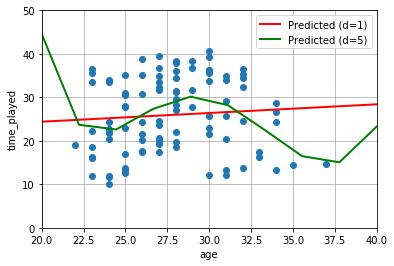

In [110]:
import numpy.polynomial.polynomial as poly
# TODO 
d1 = 1
d2 = 5
beta1 = poly.polyfit(x,y,d1)
beta2 = poly.polyfit(x,y,d2)
xp = np.linspace(20,40,10)# grid of feature values
yp_hat1 = poly.polyval(xp,beta1)# target prediction on grid using polynomial order d1
yp_hat2 = poly.polyval(xp,beta2)# target prediction on grid using polynomial order d2
# Make a scatterplot and superimpose prediction curves for d1 and d2
plt.xlim(20,40)
plt.ylim(0,50)
# Add grid lines, axis labels, and a legend
plt.grid()
plt.xlabel("age")
plt.ylabel("time_played")
plt.plot(x,y,'o')
plt.plot(xp,yp_hat1,'r-',linewidth=2,label="Predicted (d=1)")
plt.plot(xp,yp_hat2,'g-',linewidth=2,label="Predicted (d=5)")
plt.legend(loc='upper right')

How do these two model orders perform?  Are the results as expected? Can we do better?

## K-fold Cross-Validation

We now optimize the polynomial model order using 10-fold cross-validation.  You can follow the method used in the polynomial demo.  The first step is to create a matrix of test MSE values over all hypothesized model orders and all splits.  Consider model orders between 0 and 7.

In [83]:
from sklearn import model_selection
#Create a k-fold object
k = 10
kfo = model_selection.KFold(n_splits=k,shuffle=True)
# Test model orders d between 0 and 7
dtest = range(8)
nd = len(dtest)
MSEts = np.zeros((nd,k))
# Loop over the folds
for isplit, Ind in enumerate(kfo.split(x)):
    # Get the training data in the split
    Itr, Its = Ind
    xtr = x[Itr]
    ytr = y[Itr]
    xts = x[Its]
    yts = y[Its]
    # Loop over the model order
    for it, d in enumerate(dtest):
        # Fit data on training data
        beta_hat = poly.polyfit(xtr, ytr, d)
        # Measure MSE on test data
        yhat = poly.polyval(xts, beta_hat)
        MSEts[it,isplit] = np.mean((yhat-yts)**2) 

Next, compute the mean and standard error of the MSE over the folds for each model order.  The standard error is defined as the standard deviation divided by $\sqrt{K}$, where $K$ is the number of folds.  Use `ddof=1` in `np.std` to get the unbiased version.

With these MSE statistics, use the one-standard-error rule to find the best model order.  Print out the model order that minimizes mean test MSE, as well as the model order estimated by the one-standard-error rule, using the format

    The model order that minimizes mean test MSE is xx
    The model order estimated by the one-standard-error rule is xx

In [84]:
# TODO
MSE_mean = np.mean(MSEts, axis=1)
MSE_se = np.std(MSEts, axis=1, ddof=1)/np.sqrt(k)
min_MSE_mean = min(MSE_mean)
print("The model order that minimizes mean test MSE is {0:.2f}".format(min_MSE_mean))
MSE_tgt
MSE_mean

The model order that minimizes mean test MSE is 65.68


array([ 74.7792275 ,  75.97988912,  65.98228781,  69.1659004 ,
        65.67998305,  68.0779776 , 138.86894343, 129.71317717])

Next, illustrate the one-standard-error-rule procedure by making a plot that shows the following:
* the mean test MSE curve with errorbars
* a dashed line showing the model order yielding minimum mean test MSE
* a dashed line showing the target MSE
* a dashed line showing the model order estimated by the one-standard-error rule

Also, add a grid and axis labels to your plot.  Use `plt.ylim` if needed to zoom into the relevant range.

The model order estimated by the one-standard-error rule is 2


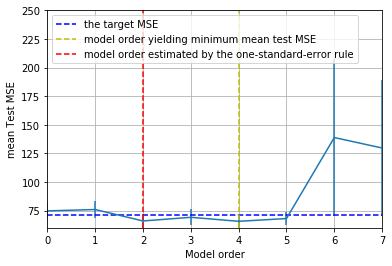

In [111]:
# TODO
plt.errorbar(dtest, MSE_mean, yerr=MSE_se, fmt="-")
plt.xlabel("Model order")
plt.ylabel("mean Test MSE")
plt.grid()
plt.xlim(0,7)
plt.ylim(60,250)
MSE_se_dmin = MSE_se[np.where(MSE_mean==min_MSE_mean)[0][0]]
MSE_tgt = min_MSE_mean + MSE_se_dmin
plt.axhline(y = MSE_tgt, color = 'b', linestyle = '--',label="the target MSE") 
plt.axvline(x= 4, color='y', linestyle = '--',label="model order yielding minimum mean test MSE")
plt.axvline(x= 2,color='r', linestyle = '--',label="model order estimated by the one-standard-error rule")
plt.legend(loc="upper left")
d_OSE=2
print("The model order estimated by the one-standard-error rule is {}".format(d_OSE))

Finally, make a scatter plot of the data and superimpose
* the polynomial prediction curve with the order that minimizes mean MSE
* the polynomial prediction curve with the order selected by the one-standard-error rule

As usual, add grid lines, axis labels, and a legend to your plot.

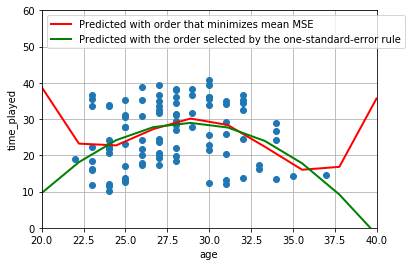

In [109]:
# TODO
d1 = 4
d2 = 2
beta1 = poly.polyfit(x,y,d1)
beta2 = poly.polyfit(x,y,d2)
xp = np.linspace(20,40,10)# grid of feature values
yp_hat1 = poly.polyval(xp,beta1)# target prediction on grid using polynomial order d1
yp_hat2 = poly.polyval(xp,beta2)# target prediction on grid using polynomial order d2
# Make a scatterplot and superimpose prediction curves for d1 and d2
plt.xlim(20,40)
plt.ylim(0,60)
# Add grid lines, axis labels, and a legend
plt.grid()
plt.xlabel("age")
plt.ylabel("time_played")
plt.plot(x,y,'o')
plt.plot(xp,yp_hat1,'r-',linewidth=2,label="Predicted with order that minimizes mean MSE")
plt.plot(xp,yp_hat2,'g-',linewidth=2,label="Predicted with the order selected by the one-standard-error rule")
plt.legend(loc='upper left')

Note that because the shuffling done by the K-fold object is random, the results may vary each time you run the code.  If that is distracting, you can fix the `random_seed` of the K-fold object, but remember that the results are just one realization of the random result.